In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
apple_df = pd.read_csv(r"C:\Users\pc\Downloads\apple_sales_2024.csv")

## Data Inspection

In [6]:
apple_df.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [8]:
apple_df.tail()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49
999,Shanghai,Greater China,26.30,4.06,3.41,5.69,14.29


In [10]:
apple_df.shape

(1000, 7)

In [12]:
apple_df.dtypes

State                               object
Region                              object
iPhone Sales (in million units)    float64
iPad Sales (in million units)      float64
Mac Sales (in million units)       float64
Wearables (in million units)       float64
Services Revenue (in billion $)    float64
dtype: object

In [14]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


##  Data Cleaning

In [17]:
apple_df.isnull().sum()

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64

In [19]:
apple_df.duplicated().sum()

0

#### - The dataset is complete with no missing values or duplicate entries, and all data types are correctly assigned.

## Standardizing column names

In [23]:
#apple_df['Services Revenue (in million $)'] = apple_df['Services Revenue (in billion $)'] * 1000

#apple_df[['Services Revenue (in billion $)', 'Services Revenue (in million $)']].head()


## EDA

In [26]:
apple_df.describe()

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.444500,8.565880,5.555760,6.935500,12.447130
std,7.180077,3.735994,2.506491,2.951677,4.306347
min,5.030000,2.020000,1.010000,2.000000,5.010000
25%,11.447500,5.432500,3.470000,4.330000,8.710000
50%,17.130000,8.695000,5.550000,6.815000,12.205000
75%,23.715000,11.740000,7.730000,9.532500,16.252500
max,29.940000,14.990000,9.990000,12.000000,19.920000


#### - The descriptive statistics of the Apple sales dataset highlight key metrics across various product categories. Each category has a substantial count of 1,000 data points, ensuring reliable analysis. The average sales figures (in million units) for iPhone, iPad, Mac, and Wearables are 17.44, 8.57, 5.56, and 6.94, respectively, while the average Services Revenue is 12.45 billion dollars. The standard deviation values indicate the variability in sales, with iPhone sales showing the highest spread (7.18 million units) and Mac sales the lowest (2.51 million units). The minimum, maximum, and quartile values provide insights into the distribution and range of sales across all categories.

### Outliers 

In [30]:
numeric_cols = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                'Mac Sales (in million units)', 'Wearables (in million units)', 
                'Services Revenue (in billion $)']

Q1 = apple_df[numeric_cols].quantile(0.25)
Q3 = apple_df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = apple_df[(apple_df[numeric_cols] < lower_bound) | (apple_df[numeric_cols] > upper_bound)]
print(outliers)


    State Region  iPhone Sales (in million units)  \
0     NaN    NaN                              NaN   
1     NaN    NaN                              NaN   
2     NaN    NaN                              NaN   
3     NaN    NaN                              NaN   
4     NaN    NaN                              NaN   
..    ...    ...                              ...   
995   NaN    NaN                              NaN   
996   NaN    NaN                              NaN   
997   NaN    NaN                              NaN   
998   NaN    NaN                              NaN   
999   NaN    NaN                              NaN   

     iPad Sales (in million units)  Mac Sales (in million units)  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                      

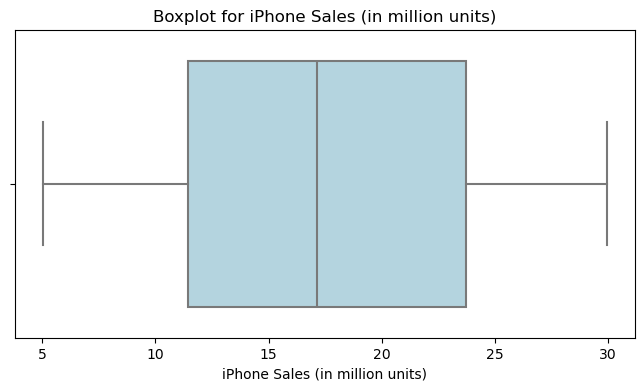

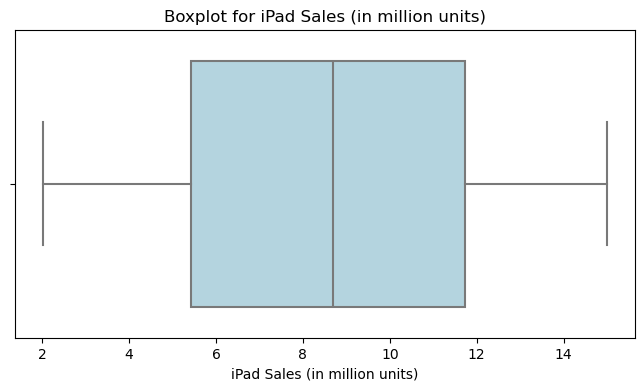

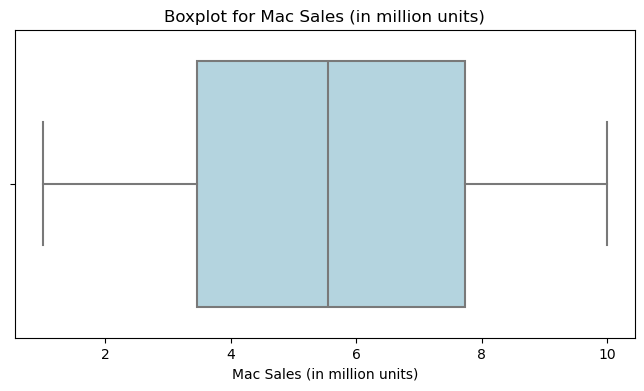

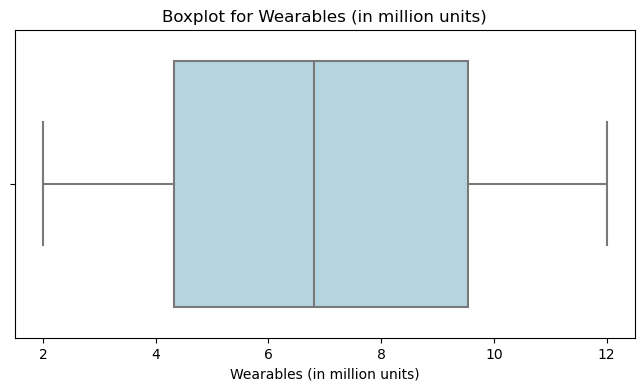

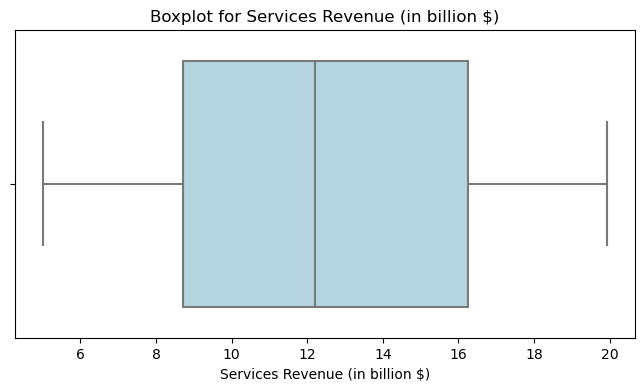

In [32]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=apple_df[col], color="lightblue")
    plt.title(f"Boxplot for {col}")
    plt.show()


#### - All five distributions do not show any outliers. This suggests that:

####    1. The data is relatively well-contained within the expected range of values
####    2. The whiskers capture all data points (typically extending to 1.5 times the interquartile range)
####    3. The sales/revenue figures for each product category show consistent patterns without extreme anomalies

#### This indicates that while there is variation in the sales and revenue figures, the fluctuations remain within expected bounds. Even during peak seasons (like holiday quarters) or lower-performing periods, the numbers stay within predictable ranges for each product category.

## Correlations between sales of different products.

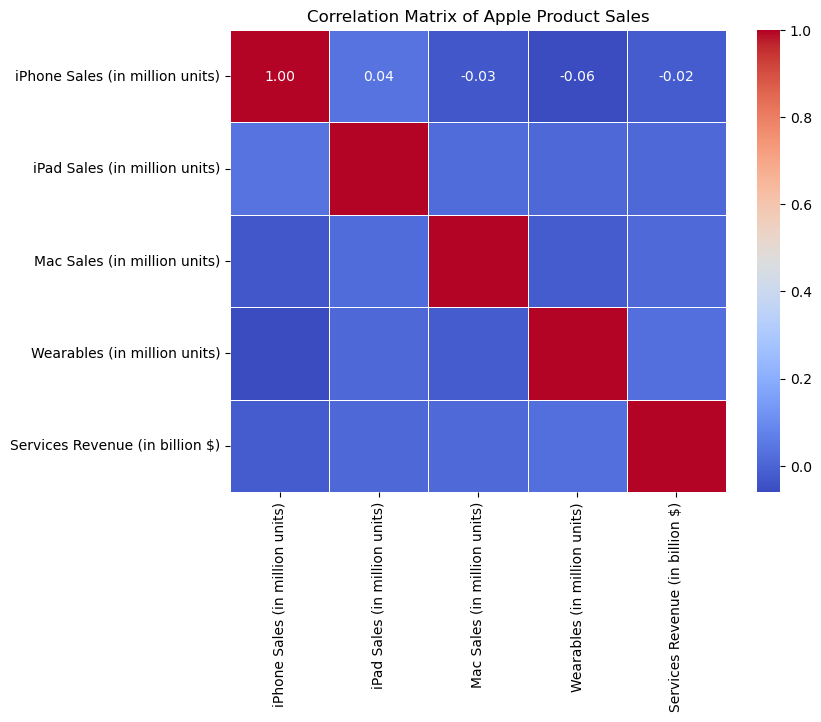

In [36]:
sales_columns = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                 'Mac Sales (in million units)', 'Wearables (in million units)', 
                 'Services Revenue (in billion $)']

sales_corr = apple_df[sales_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(sales_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Apple Product Sales")
plt.show()

# Sales Analysis 

## Distribution of sales per product category 

In [40]:
sales_per_category = apple_df.iloc[:, 2:].sum()
sales_per_category

iPhone Sales (in million units)    17444.50
iPad Sales (in million units)       8565.88
Mac Sales (in million units)        5555.76
Wearables (in million units)        6935.50
Services Revenue (in billion $)    12447.13
dtype: float64

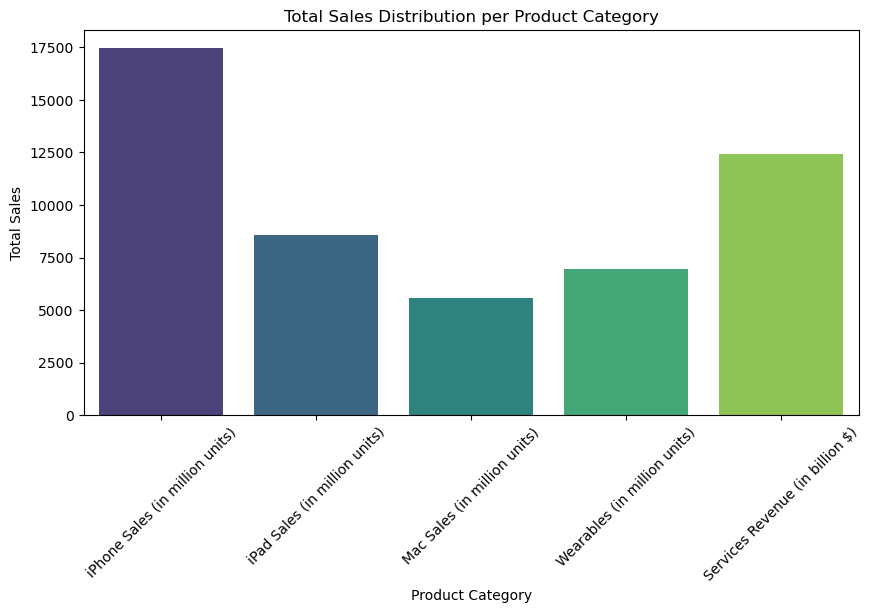

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_per_category.index, y=sales_per_category.values, palette="viridis")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Total Sales Distribution per Product Category")
plt.xticks(rotation=45)
plt.show()

#### -The weak correlations suggest that the sales performance of one product category doesn't significantly affect the others, allowing Apple to diversify its product portfolio effectively.

## Top-performing and bottom-performing states in terms of sales

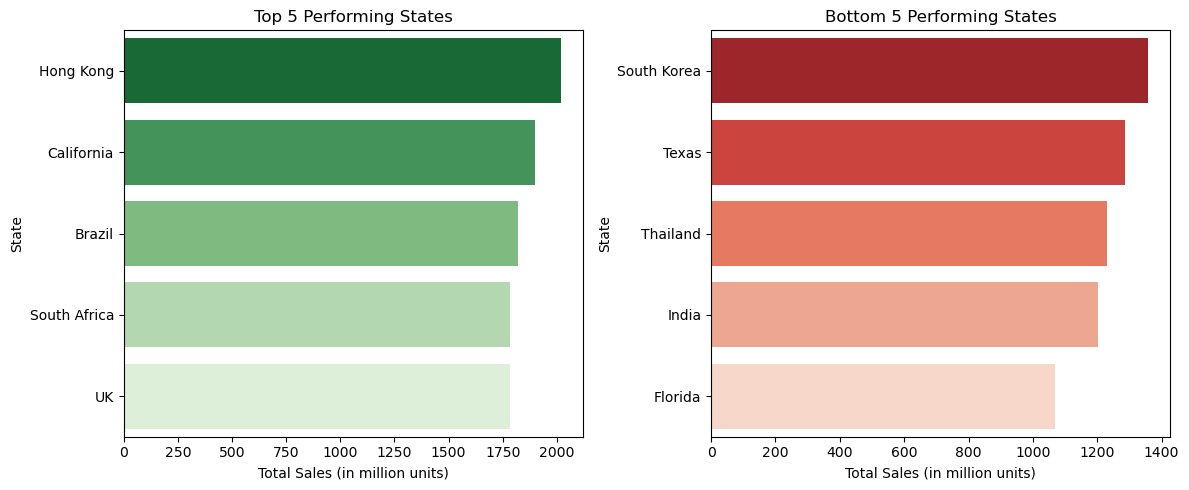

In [46]:
sales_columns = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                 'Mac Sales (in million units)', 'Wearables (in million units)', ]

apple_df['Total Sales'] = apple_df[sales_columns].sum(axis=1)

state_sales = apple_df.groupby("State")["Total Sales"].sum().sort_values(ascending=False)

top_states = state_sales.head(5)
bottom_states = state_sales.tail(5)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=top_states.values, y=top_states.index, palette="Greens_r")
plt.title("Top 5 Performing States")
plt.xlabel("Total Sales (in million units)")

plt.subplot(1, 2, 2)
sns.barplot(x=bottom_states.values, y=bottom_states.index, palette="Reds_r")
plt.title("Bottom 5 Performing States")
plt.xlabel("Total Sales (in million units)")

plt.tight_layout()
plt.show()


## Regions Sales Performance 

In [49]:
sales_columns = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                 'Mac Sales (in million units)', 'Wearables (in million units)']

apple_df['Total Sales'] = apple_df[sales_columns].sum(axis=1)

region_sales = apple_df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)

print("Regions Sales Performance:\n", region_sales.head())

Regions Sales Performance:
 Region
Greater China    8458.89
Rest of World    8374.18
Europe           7773.12
North America    7051.46
Rest of Asia     6843.99
Name: Total Sales, dtype: float64


 ## Percentage contribution of each product category

Percentage Contribution of Each Category to Overall Sales:
iPhone Sales (in million units)    45.308460
iPad Sales (in million units)      22.248091
Mac Sales (in million units)       14.429931
Wearables (in million units)       18.013518
dtype: float64


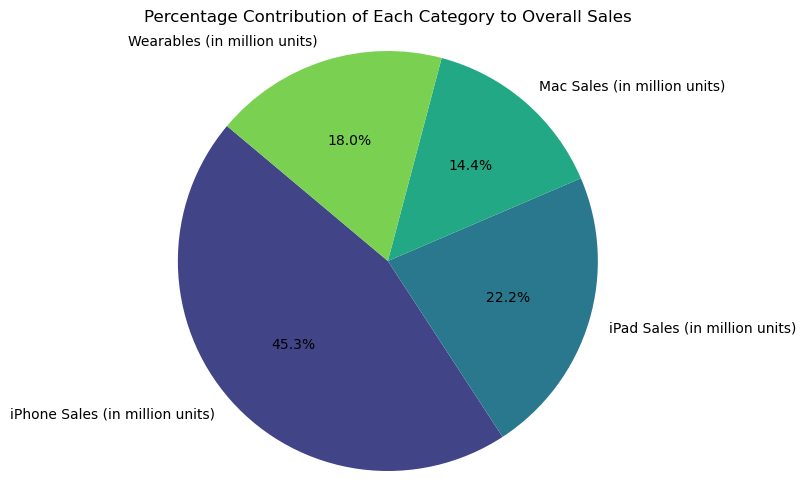

In [52]:
category_sales = apple_df[sales_columns].sum()

overall_sales = category_sales.sum()

category_percentage = (category_sales / overall_sales) * 100

print("Percentage Contribution of Each Category to Overall Sales:")
print(category_percentage)

plt.figure(figsize=(8, 6))
plt.pie(category_percentage.values, labels=category_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(category_percentage)))
plt.title("Percentage Contribution of Each Category to Overall Sales")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### -The analysis critical insights into the performance of different product categories. The pie chart illustrates the percentage contribution of each category to overall sales, with iPhones leading at 34.2%. The Services Revenue follows at 24.4%, highlighting its growing importance in Apple's revenue stream. iPads, Wearables, and Macs contribute 16.8%, 13.6%, and 10.9% respectively, reflecting their steady but varied demand.

#### -These visualization enables a clear understanding of sales distribution across product categories, providing valuable information for strategic planning and decision-making. The findings underscore the significance of iPhone sales while also emphasizing the potential of services revenue and other product lines in driving Apple's growth.

## Percentage Contribution of Each Product Category per Region

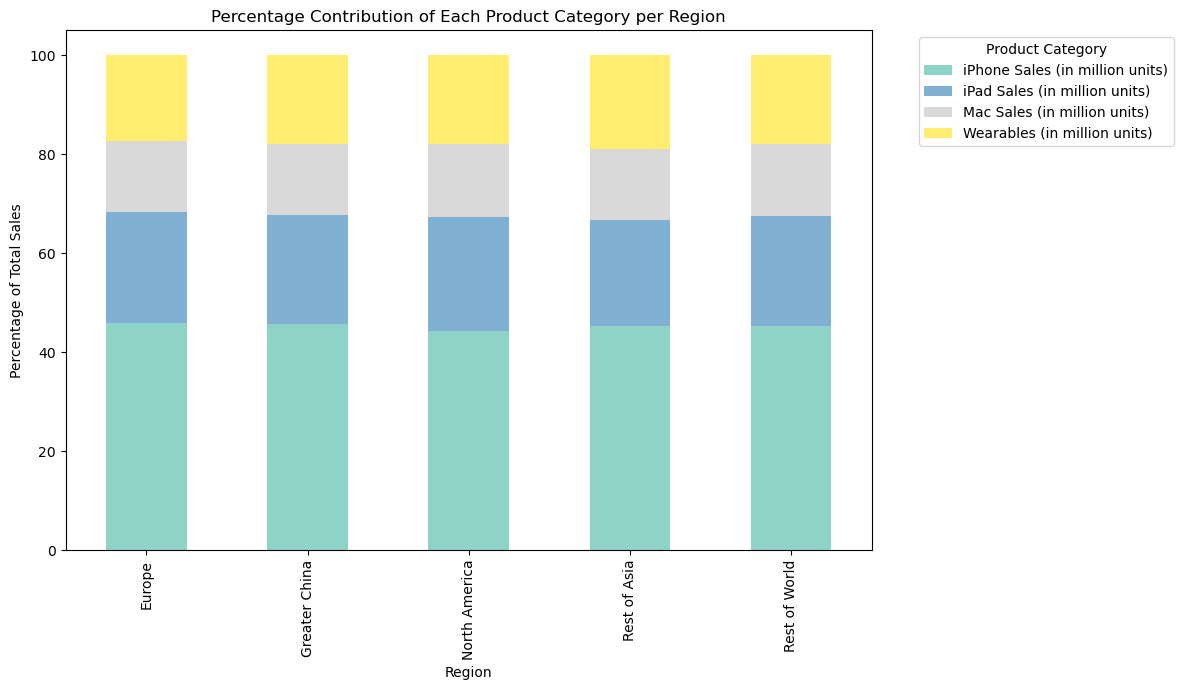

In [56]:
region_category_sales = apple_df.groupby("Region")[sales_columns].sum()
region_category_percentage = region_category_sales.div(region_category_sales.sum(axis=1), axis=0) * 100

region_category_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="Set3")
plt.title("Percentage Contribution of Each Product Category per Region")
plt.ylabel("Percentage of Total Sales")
plt.xlabel("Region")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##  The impact of Services Revenue on Total Sales

Correlation Coefficient: -0.00, P-value: 0.95205


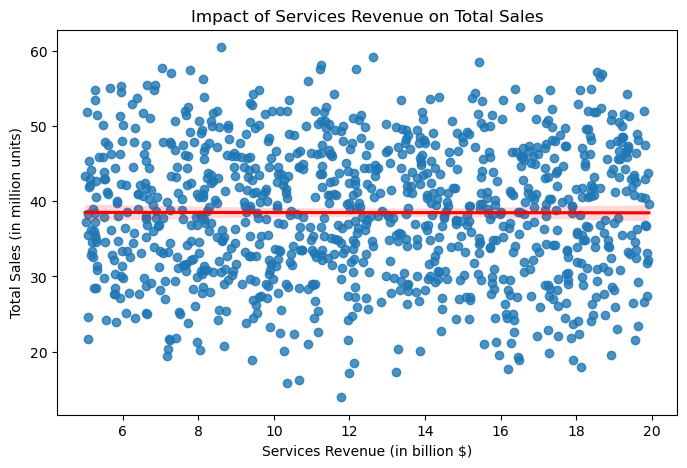

Regression Coefficient (Slope): -0.00
Intercept: 38.55


In [59]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Compute Total Sales (excluding Services Revenue)
apple_df["Total Sales"] = (
    apple_df["iPhone Sales (in million units)"] + apple_df["iPad Sales (in million units)"] + apple_df["Mac Sales (in million units)"] + apple_df["Wearables (in million units)"]
)

# Correlation Analysis
corr, p_value = pearsonr(apple_df["Services Revenue (in billion $)"], apple_df["Total Sales"])
print(f"Correlation Coefficient: {corr:.2f}, P-value: {p_value:.5f}")


plt.figure(figsize=(8, 5))
sns.regplot(x=apple_df["Services Revenue (in billion $)"], y=apple_df["Total Sales"], line_kws={"color": "red"})
plt.xlabel("Services Revenue (in billion $)")
plt.ylabel("Total Sales (in million units)")
plt.title("Impact of Services Revenue on Total Sales")
plt.show()

# Regression Analysis
X = apple_df[["Services Revenue (in billion $)"]]
y = apple_df["Total Sales"]

model = LinearRegression()
model.fit(X, y)

print(f"Regression Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

#### - Regression Coefficient (Slope): -0.00 : This implies that there is almost no relationship between services revenue and total sales. When services revenue changes, the total sales remain largely unaffected.

#### - Intercept: 38.55 : The intercept value represents the predicted value of the total sales when services revenue is zero. In this case, it means that if services revenue was zero, the total sales would be approximately 38.55 million units.

#### - The red regression line appears almost flat, reinforcing the idea of no linear relationship between the two variables.

#### - Changes in services revenue do not significantly influence total sales for Apple.

#### - Total sales hover around 38.55 million units regardless of services revenue values.



## Services Revenue vs. Product Sales

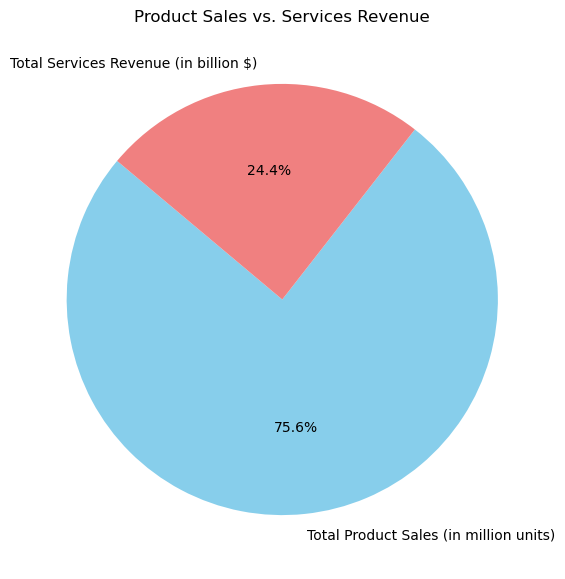

In [63]:
product_sales_columns = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                         'Mac Sales (in million units)', 'Wearables (in million units)']

apple_df['Total Product Sales (in million units)'] = apple_df[product_sales_columns].sum(axis=1)
apple_df['Total Services Revenue (in billion $)'] = apple_df['Services Revenue (in billion $)']

total_product_sales = apple_df['Total Product Sales (in million units)'].sum()
total_services_revenue = apple_df['Total Services Revenue (in billion $)'].sum()

# comparison DataFrame
comparison_df = pd.DataFrame({
    "Category": ["Total Product Sales (in million units)", "Total Services Revenue (in billion $)"],
    "Sales": [total_product_sales, total_services_revenue]
})

plt.figure(figsize=(7, 7))
plt.pie(comparison_df["Sales"], labels=comparison_df["Category"], autopct='%1.1f%%', 
        startangle=140, colors=["skyblue", "lightcoral"])
plt.title("Product Sales vs. Services Revenue")
plt.show()




## Compare the distribution of revenue

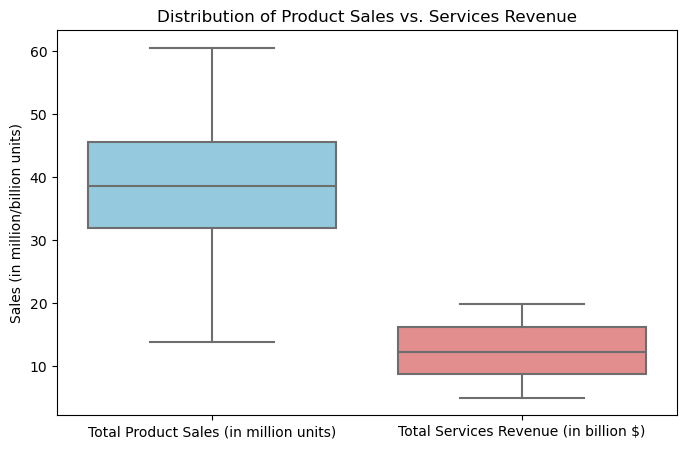

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=apple_df[['Total Product Sales (in million units)', 'Total Services Revenue (in billion $)']], palette=["skyblue", "lightcoral"])
plt.title("Distribution of Product Sales vs. Services Revenue")
plt.ylabel("Sales (in million/billion units)")
plt.show()


## Market Share of Each Product Category in Total Sales

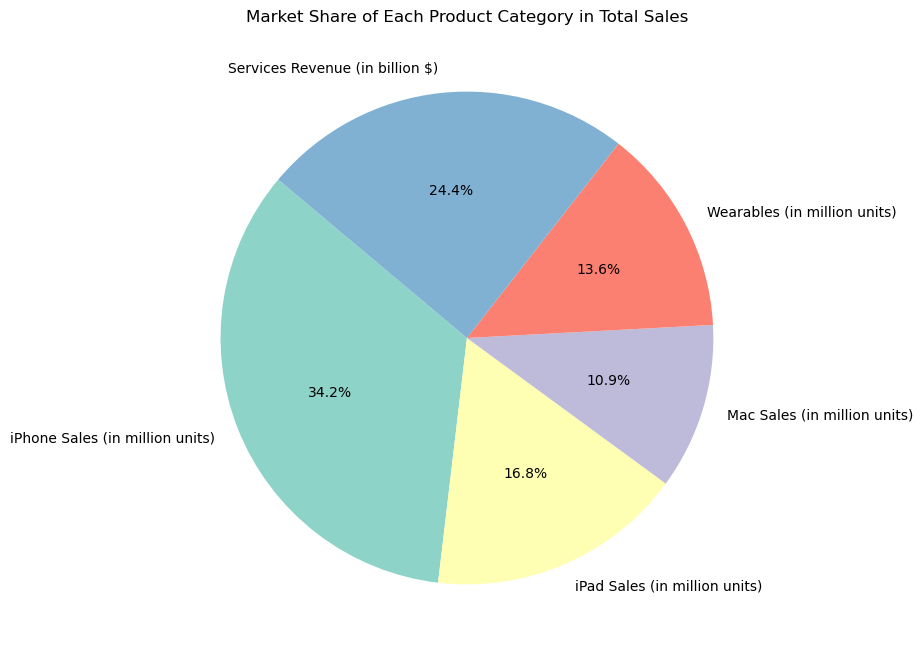

In [75]:
product_sales_columns = ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 
                         'Mac Sales (in million units)', 'Wearables (in million units)', 
                         'Services Revenue (in billion $)']

category_sales = apple_df[product_sales_columns].sum()

total_sales = category_sales.sum()

market_share = (category_sales / total_sales) * 100

plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette("Set3", len(market_share)))
plt.title("Market Share of Each Product Category in Total Sales")
plt.show()


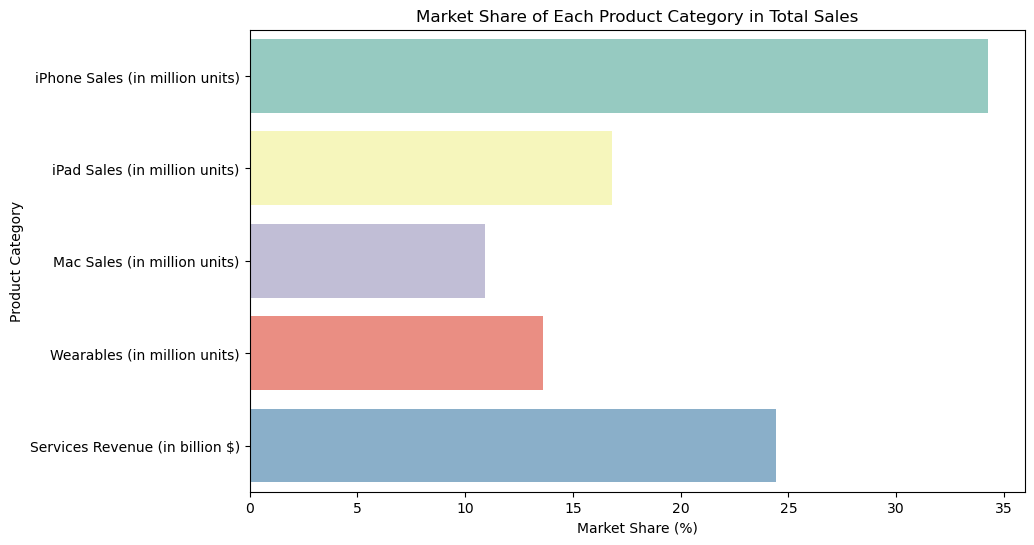

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x=market_share.values, y=market_share.index, palette="Set3")
plt.xlabel("Market Share (%)")
plt.ylabel("Product Category")
plt.title("Market Share of Each Product Category in Total Sales")
plt.show()
